<a href="https://colab.research.google.com/github/arizzi/NNTutorial/blob/master/Tutorial3empty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import useful stuff

In [1]:
from keras.layers import Input,Dense,Dropout
from keras.models import Model
import numpy as np
from math import *
from matplotlib import pyplot as plt 

Using TensorFlow backend.


## Lets generate some data

We now generate 3000 samples of Signal and Background.
Each sample has three features named x,y,z below.
Samples have a 4th entry that is the "label", 1 for signal, 0 for background

The two functions below are  generating random values for x,y,z with different distributions for signal and background 

Try changing the distributions of the x,y,z value (but do not make it too easy to distinguish signal from background!)

Try adding more (or less) features. How do you need to modify the line that access the labels?

Later on, also try changing the number of samples and see if with few samples overfit occurs

In [2]:
nsamples=3000

def signalFeatures():
  x=np.random.rand()*3
  y=np.random.rand()*2
  z=cos(x*y)
  return x,y,z,1 #the last value here is the label, 1 = signal

def backgroundFeatures():
  x=np.random.normal(loc=1.5) #mean in 1.5
  y=1/(abs(x)+1)+np.random.rand()*0.7
  z=cos(x)
  return x,y,z,0 #the last value here is the label, 0 = signal



signal = np.asarray([signalFeatures() for x in range(nsamples)])
background = np.asarray([backgroundFeatures() for x in range(nsamples)])


print("Signal")
print("Shape is:", signal.shape)
print(signal)
print("Signal, one entry")
print(signal[0,:])

print(signal[:,2])


  

Signal
Shape is: (3000, 4)
[[ 0.64454084  0.2396541   0.9880937   1.        ]
 [ 2.13990253  1.69641971 -0.88300018  1.        ]
 [ 2.91449628  1.33274263 -0.73665828  1.        ]
 ...
 [ 1.35893765  0.74441671  0.53049164  1.        ]
 [ 1.87476052  1.41577969 -0.88357936  1.        ]
 [ 2.21547456  1.02441555 -0.64327664  1.        ]]
Signal, one entry
[0.64454084 0.2396541  0.9880937  1.        ]
[ 0.9880937  -0.88300018 -0.73665828 ...  0.53049164 -0.88357936
 -0.64327664]


How would you print "feature z" (i.e. feature at index 2) for all entries? and how would you print the background?

In [3]:
print("Signal feature 2")
#...code to print feature 2 for all events...
print("Background")
#...code to print background events...

Signal feature 2
Background


Let's look at our generated features for signal and background

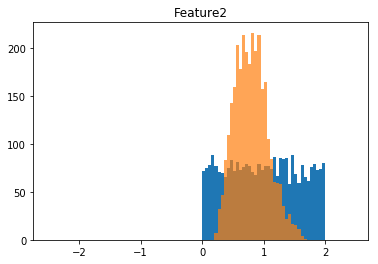

In [4]:
plt.hist(signal[:,1], bins = [ (x/20.-2.5) for x in range(100)]) 
plt.title("Feature2") 
plt.hist(background[:,1], bins = [ (x/20.-2.5) for x in range(100)],alpha=.7) #make it a bit transparent 
plt.show()

Scatter plotting  with feature x and y

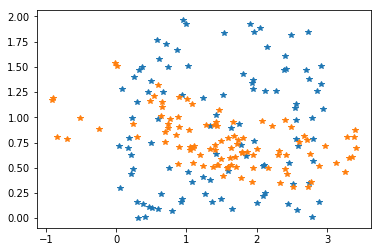

In [5]:
plt.plot(signal[0:100,0],signal[0:100,1],'*')
plt.plot(background[0:100,0],background[0:100,1],'*')


Try plotting 1D the other variables and plot other pairs of variables instead of (x,y) 
(if using a notepad, add yourself a code cell below this one)

Now we concatenate all data and shuffle it... how would you check that shuffling really happened?

In [6]:
data=np.concatenate((background,signal))
np.random.shuffle(data)
print(data)
data_features=data[:,0:3]
data_labels=data[:,3:4]

[[ 1.67920057  1.63688108 -0.92378693  1.        ]
 [ 1.06547615  0.66109395  0.48408762  0.        ]
 [ 2.33828692  0.42048681 -0.69433152  0.        ]
 ...
 [ 1.65136318  0.34320823  0.84364419  1.        ]
 [ 1.48266181  1.98994898 -0.98178235  1.        ]
 [ 1.15300237  0.17502659  0.97970617  1.        ]]


# Let's build a NN 

First we can try to just build a single hidden layer  FF network, aka MLP

After you run the whole thing once, come back here and try building your first  Deep Network with 3 or 4 hidden layers


In [7]:
inputs=Input(shape=(3,))
hidden=  Dense(10, activation='relu')(inputs)
outputs = Dense(1, activation='sigmoid')(hidden)
model = Model(input=inputs, output=outputs)
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()


history=model.fit(data_features,data_labels,validation_split=0.5,nb_epoch=50)

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                40        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


Train on 3000 samples, validate on 3000 samples
Epoch 1/50
3000/3000 [==============================] - 0s 109us/step - loss: 0.6738 - acc: 0.5663 - val_loss: 0.6673 - val_acc: 0.5917
Epoch 2/50
3000/3000 [==============================] - 0s 51us/step - loss: 0.6630 - acc: 0.5887 - val_loss: 0.6571 - val_acc: 0.6040
Epoch 3/50
3000/3000 [==============================] - 0s 52us/step - loss: 0.6511 - acc: 0.6160 - val_loss: 0.6459 - val_acc: 0.6290
Epoch 4/50
3000/3000 [==============================] - 0s 52us/step - loss: 0.6404 - acc: 0.6310 - val_loss: 0.6344 - val_acc: 0.6440
Epoch 5/50
3000/3000 [==============================] - 0s 50us/step - loss: 0.6289 - acc: 0.6447 - val_loss: 0.6222 - val_acc: 0.6543
Epoch 6/50
3000/3000 [==============================] - 0s 49us/step - loss: 0.6169 - acc: 0.6470 - val_loss: 0.6095 - val_acc: 0.6643
Epoch 7/50
3000/3000 [==============================] - 0s 51us/step - loss: 0.6039 - acc: 0.6580 - val_loss: 0.5962 - val_acc: 0.6737
Epoch 

*history* contains information about the training.  We can now now show the loss vs epoch for both validation and training samples.

Try comparing the performance you get with a single layer MLP and a 4 hidden layers FF Deep Network
Try comparing this with nsamples=30 or =10 instead of 3000. Are the performance comparable? Is there overfit?


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


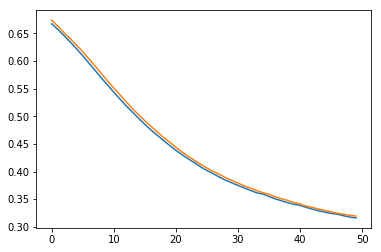

In [8]:
print(history.history.keys())
plt.plot(history.history["val_loss"])
plt.plot(history.history["loss"])
plt.show()

In [9]:
preds=model.predict(data_features)
print(np.hstack( (preds,data_features) )) #compare prediction and targets

[[ 0.9861939   1.67920057  1.63688108 -0.92378693]
 [ 0.34562966  1.06547615  0.66109395  0.48408762]
 [ 0.01385349  2.33828692  0.42048681 -0.69433152]
 ...
 [ 0.96987766  1.65136318  0.34320823  0.84364419]
 [ 0.99742109  1.48266181  1.98994898 -0.98178235]
 [ 0.98475212  1.15300237  0.17502659  0.97970617]]


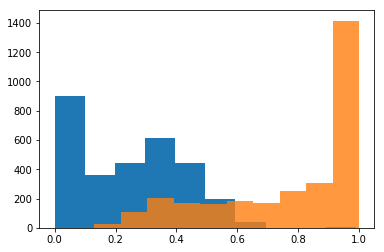

In [10]:
plt.hist(preds[(data_labels==0)])
plt.hist(preds[(data_labels==1)],alpha=0.8)
plt.show()